# Notebook for Metalign Data Analysis

----

Regular imports

In [1]:
from src.metalign_analysis import MetalignDB as DB

Provide the file path to the Metalign data file and initialize the class.
This attempts to set up the database if it hasn't already been created

In [2]:
leaves = "data/Leaf_all.nostrain.txt"
db = DB(leaves)

Start time: 2025-05-01 10:36:57.309778
End time: 2025-05-01 10:37:01.606139
Total runtime: 0:00:04.296361


If metadata is available, add it to the class initialized. Using the samples template file submitted to Cornell's slims website, then you can add extra columns that represent categories to the template file. You can pass the names of the other categorical variables (columns) you want as arguments

In [3]:
metadata_file = "data/leaf_phenotype.csv"
db.get_metadata(metadata_file, categories=['samples', 'site', 'treatment_herb_level'], sep=',', index_col='samples')

,site,treatment_herb_level
samples,,
A01,sky,2
B01,sky,1
C01,sky,1
D01,sky,1
E01,sky,3
...,...,...
D09,mea,3
E09,mea,3
F09,mea,3


***

## Calculate Diversity Metrics

- For either alpha or beta diversity, you have the liberty to specify which metric has to be used for the computation

Calculate alpha diversity


In [4]:
alpha_div = db.get_alpha_diversity("chao1")
print(f"Alpha diversity for all samples: \n{list(alpha_div)}")

Alpha diversity for all samples: 
[3990.0, 2342.0, 3021.0, 1148.0, 1339.0, 456.0, 3196.0, 616.0, 3715.0, 1100.0, 2122.0, 555.0, 3143.0, 3254.0, 2854.0, 916.0, 1988.0, 1979.0, 1129.0, 1498.0, 3100.0, 2166.0, 1728.0, 666.0, 1378.0, 3497.0, 1281.0, 1034.0, 2647.0, 3515.0, 3137.0, 3428.0, 1181.0, 1500.0, 343.0, 4045.0, 4224.0, 2827.0, 382.0, 3102.0, 667.0, 3218.0, 3103.0, 3818.0, 653.0, 1118.0, 1032.0, 4249.0, 1505.0, 2760.0, 768.0, 1110.0, 418.0, 1498.0, 4055.0, 1795.0, 1092.0, 2280.0, 368.0, 901.0, 2809.0, 2463.0, 2540.0, 970.0, 1877.0, 1659.0, 2172.0, 1647.0, 1740.0, 964.0, 406.0, 1199.0, 1918.0, 2562.0, 638.0, 887.0, 1502.0, 2169.0, 2303.0, 2448.0, 1114.0]


Calculate beta diversity

In [5]:
beta_diversity = db.get_beta_diversity()
print(beta_diversity.to_data_frame().head(2))

         A01      A02       A03       A04       A05       A06       A07  \
A01  0.00000  0.70486  0.502514  0.797751  0.874184  0.927616  0.528859   
A02  0.70486  0.00000  0.734496  0.760315  0.803246  0.915262  0.821276   

          A08       A09       A10  ...       G01       G02       G03      G04  \
A01  0.972639  0.540748  0.775566  ...  0.853281  0.647125  0.517780  0.89415   
A02  0.970512  0.548019  0.863316  ...  0.746520  0.830666  0.840205  0.87312   

          G05       G06       G07       G08       G09       G10  
A01  0.831050  0.720624  0.678978  0.558264  0.594659  0.792165  
A02  0.844255  0.837203  0.754924  0.830199  0.858649  0.730100  

[2 rows x 81 columns]


## Display taxa-level information for samples

This returns individual records based on the taxa. If __`sample_id`__ is not specified, each will return a dataframe of all individuals for each sample and their relative abundance. The output is sorted in descending order of relative abundance.

In [6]:
all_species = db.get_all_species()
all_species

,species_id,species_name,relative_abundance,sample_id
0,45617,Human endogenous retrovirus K,5.81399,C10
1,10847,Escherichia virus phiX174,5.71698,B08
2,1965386,Salmonella phage alphaalpha,5.34202,A05
3,67082,BeAn 58058 virus,4.75758,C10
4,2282408,Bacillus phage Maceta,4.18678,E04
...,...,...,...,...
157932,915471,Pseudomonas linyingensis,0.00010,G10
157933,1751969,Pseudomonas sp. 382,0.00010,G10
157934,1566202,Pseudomonas sp. NFACC44-2,0.00010,G10
157935,2058891,Arthrobacter sp. B0490,0.00010,G10


In [7]:
all_genus = db.get_all_genus()
all_genus

,genus_name,genus_id,sample_id,relative_abundance
0,Pseudomonas,286,A02,15.24638
1,Kp15virus,1985328,A08,9.76294
2,Pseudomonas,286,A09,9.42714
3,Pseudomonas,286,F04,8.97113
4,Pseudomonas,286,E10,7.11968
...,...,...,...,...
39009,Kockovaella,4998,B02,0.00010
39010,Sulfurisoma,1499082,E07,0.00010
39011,Dechloromonas,73029,F06,0.00010
39012,Azonexus,146936,G02,0.00010


In [8]:
all_family = db.get_all_family("A02")

In [9]:
all_orders = db.get_all_order()

In [10]:
all_class = db.get_all_class("A02")

In [11]:
all_phyla = db.get_all_phyla()

`-222` represents an individual with unknown kingdom id

In [12]:
all_phyla[all_phyla["superkingdom_id"] == -2222]

,phylum_name,phylum_id,superkingdom_id,sample_id,relative_abundance


## Data Visualization

### Stacked columns

This plots a bar chart, showing the relative abundance of the top `subset` phyla in the sample specified

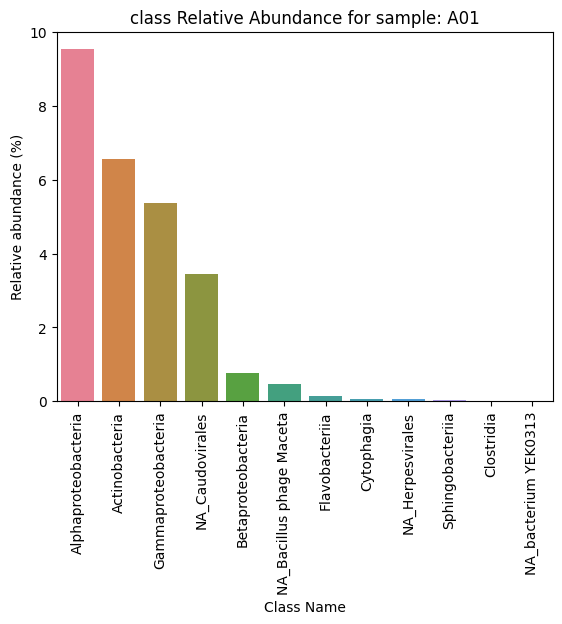

In [13]:
db.barplot_by_sample("A01", "class", 12)

Make a stacked barplot showing the relative abundances of all samples (or samples specified)

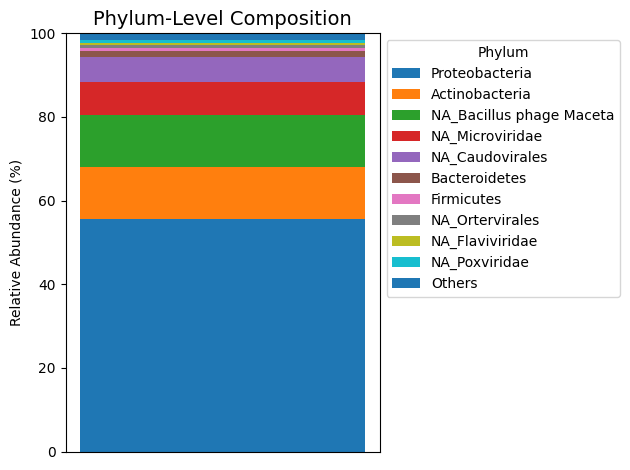

In [14]:
db.taxa_level_barplot(level='phylum', top_n=10)

Stacked barplot of all phylum taxa in samples "A01" and "A02"

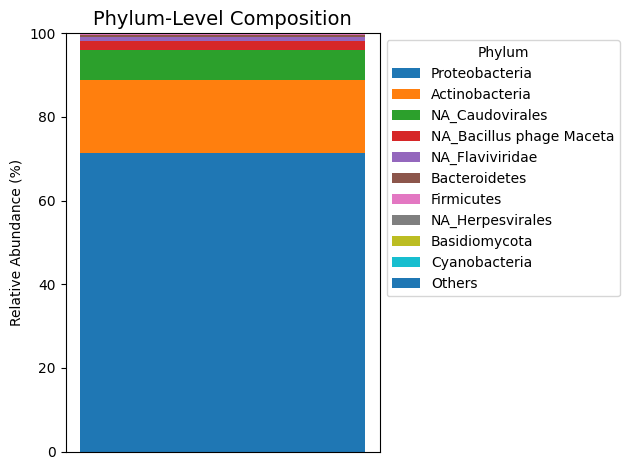

In [15]:
db.taxa_level_barplot(top_n=10, color_palette="tab10", choose_samples=["A01", "A02"])

## Principal Coordinate Analysis Plot

Show PCoA of samples and color by category (complex)

c:\Users\eopoku\AppData\Local\Programs\Python\Python313\Lib\site-packages\skbio\stats\ordination\_principal_coordinate_analysis.py:214: RuntimeWarning: The result contains negative eigenvalues that are large in magnitude, which may suggest result inaccuracy. See Notes for details. The negative-most eigenvalue is -0.13372741069889788 whereas the largest positive one is 5.0314545632125585.
  warn(


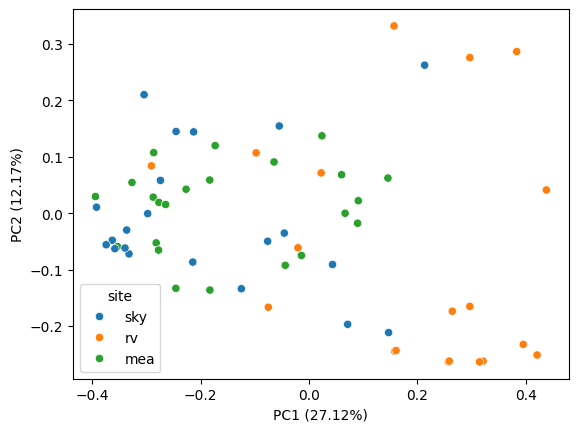

In [21]:
fig = db.plot_pcoa(color_by="site", method='eigh')   

Save pcoa dimensions to file

In [ ]:
db.save_pcoa_dimensions("pcoa_output.csv", sep=',')

## SPECIES ACCUMULATION CURVE

c:\Users\eopoku\OneDrive - William & Mary\Documents\projects\process-metalign\src\diversity_stats\calc_stats.py:109: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sample_names, rotation=90)


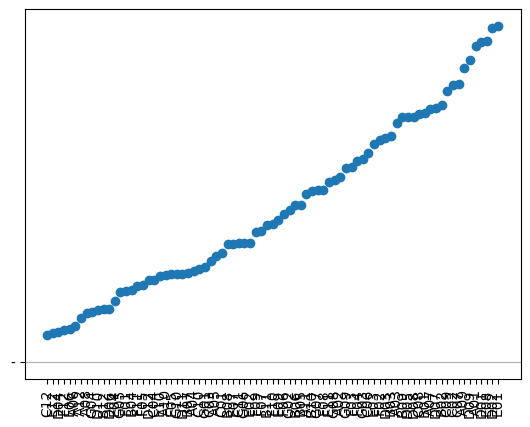

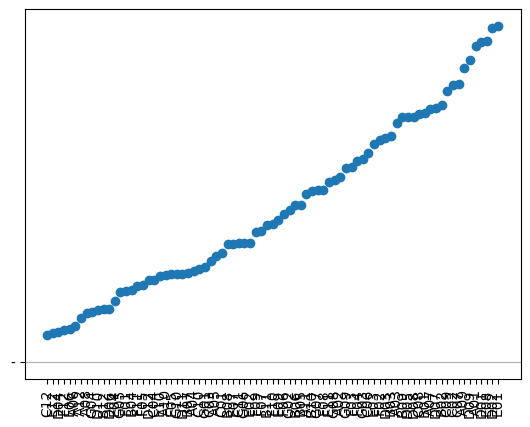

In [22]:
db.plot_species_accum('y')

## PERMANOVA (COMING SOON)

## CO-OCCURENCE NETWORKS (COMING SOON)